In [9]:
import seaborn as sns
import addcopyfighandler
import pandas as pd
import numpy as np
import osmnx as ox
import networkx as nw
from heatmap import corrplot

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import mysql.connector


import matplotlib.pyplot as plt

from scipy import integrate, stats
from app import app
from app import db

from scipy.signal import find_peaks
from scipy.stats import iqr

# Regression models
import statsmodels.stats as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

# Save model
import pickle

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
print(os.environ["PATH"])

import app.Investigation.OpenStreetMaps.associate_edges_to_operation as associate
# The OSM Graph
class OSM:
    graphpath = app.root_path + '/Investigation/OpenStreetMaps/osm_data/medellin.graphml'
    print('Empezando a cargar ')
    G = ox.load_graphml(graphpath)
    print('termina de cargar ')

C:\Users\Santiago\.conda\envs\ox;C:\Users\Santiago\.conda\envs\ox\Library\mingw-w64\bin;C:\Users\Santiago\.conda\envs\ox\Library\usr\bin;C:\Users\Santiago\.conda\envs\ox\Library\bin;C:\Users\Santiago\.conda\envs\ox\Scripts;C:\Users\Santiago\.conda\envs\ox\bin;C:\ProgramData\Anaconda3\condabin;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.2\bin;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.2\libnvvp;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0;C:\Windows\System32\OpenSSH;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\Program Files\NVIDIA Corporation\NVIDIA NvDLISR;C:\Program Files\Git\cmd;C:\Program Files\PuTTY;C:\Program Files\OpenVPN\bin;C:\Program Files (x86)\Eclipse\Sumo\bin;C:\Program Files (x86)\Eclipse\Sumo\tools;C:\Program Files\NVIDIA Corporation\Nsight Compute 2020.3.0;C:\Program Files\nodejs;C:\Program Files\Amazon\AWSCLIV2;C:\Program Files\Docker\Docker\resources\bin;C:\ProgramData\DockerDeskt

# Read operation data

In [10]:
print(app.root_path)
new_df = pd.read_csv(app.root_path+'/DataBackup/updated_vehicle_operation.csv')
old_df = pd.read_csv(app.root_path+'/DataBackup/updated_old_vehicle_operation.csv', index_col='id')


new_df.dropna(axis=1, how='all', inplace=True)
old_df.dropna(axis=1, how='all', inplace=True)


C:\Users\Santiago\OneDrive - Universidad EAFIT\Documentos\Universidad\Maestria\Aplicacion\monitoreogrid\app


C:\Users\Santiago\.conda\envs\ox\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (85,88) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\Santiago\.conda\envs\ox\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (83) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
old_df.lanes.unique()

array(['2', "['3', '2']", '3', '1', "['1', '2']", nan, '7', '4', '5',
       "['3', '4']", '6', "['4', '2']"], dtype=object)

# Read directly from Db and assign osm EDGES info

In [6]:
cnx = mysql.connector.connect(user='admin', password='actuadores',
                              host='104.236.94.94',
                              database='monitoreodb')

query = "SELECT * from operation"
op = pd.read_sql_query(query, cnx, index_col='id')
op.dropna(axis=1, how='all', inplace=True)


# UG = ox.get_undirected(OSM.G).edges(keys=True, data=True)
# print('Convierte el grafo')

# op.dropna(subset=['power_kw', 'odometer'], inplace=True)
# op = associate.add_osmn_attributes(op, UG, OSM.G)


Index(['timestamp', 'operative_state', 'latitude', 'longitude', 'elevation',
       'slope', 'speed', 'odometer', 'user_id', 'batt_temp', 'ext_temp',
       'power_kw', 'acceleration', 'capacity', 'vehicle_id', 'soc', 'soh',
       'voltage', 'current', 'throttle', 'regen_brake', 'consumption',
       'range_est', 'range_ideal', 'range_full', 'drivetime', 'charge_time',
       'footbrake', 'engine_temp', 'tpms', 'coulomb', 'energy', 'rpm',
       'charger_type', 'drivemode', 'energy_rec', 'mass', 'mec_power',
       'mean_acc', 'friction_force', 'net_force', 'run', 'en_pot',
       'mean_speed', 'freeram', 'net_signal', 'elevation2', 'charge_current',
       'angle_x', 'angle_y', 'q_loss', 'AcX', 'AcY', 'AcZ', 'humidity',
       'kwh_km'],
      dtype='object')

In [11]:
op.vehicle_id.unique()

array(['GHW284', 'BOTE01', 'FRV020', 'BOTE02', 'FVQ731'], dtype=object)

In [169]:
op.to_csv(app.root_path+'/DataBackup/updated_vehicle_operation_11_04_2021.csv', index=False)
new_df = op

39724

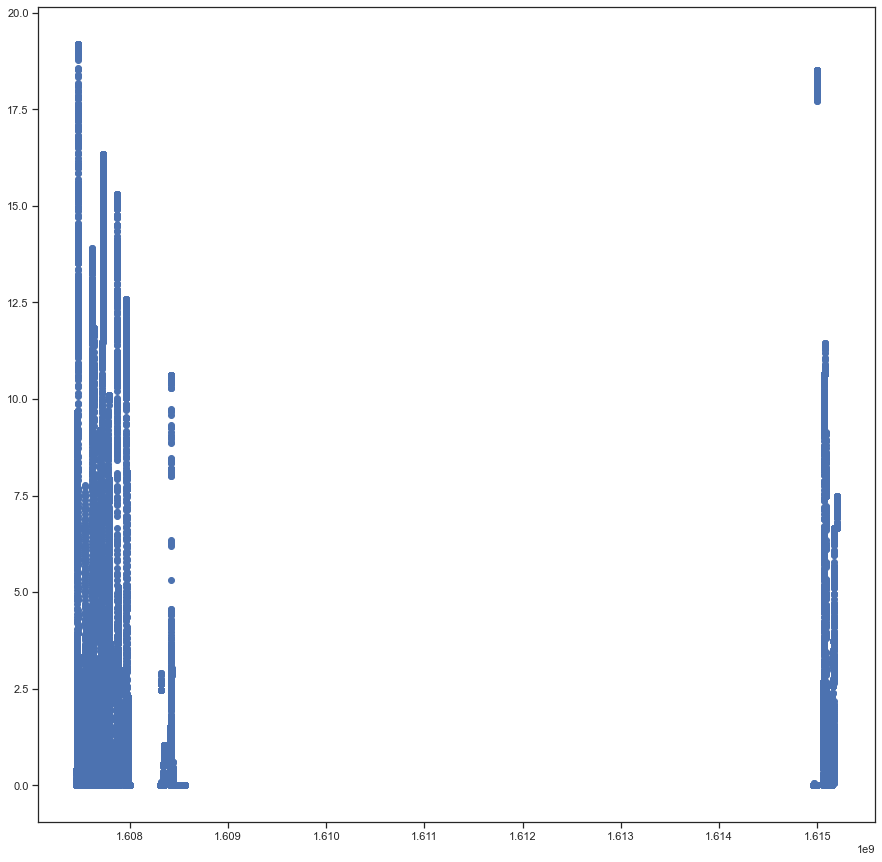

In [170]:
enrgy_n = new_df[new_df['energy'] > -2.51109e+20][['operative_state', 'timestamp2',
       'slope', 'speed', 'odometer', 'user_id',
       'power_kw', 'capacity', 'soc',
       'voltage', 'current', 'consumption',
       'energy', 'rpm',
       'drivemode',
       'mean_acc', 'run',
       'mean_speed']]
plt.figure(figsize=[15,15])
plt.scatter(x=enrgy_n.timestamp2, y=enrgy_n.energy)
len(enrgy_n.energy)


# Validation of run metric

In [37]:

print(old_df['run'][old_df['vehicle_id']=='FSV110'].sum()/1000)
print(old_df['run'][old_df['vehicle_id']=='GHW284'].sum()/1000)
print(new_df['run'][new_df['vehicle_id']=='GHW284'].sum()/1000)


print(old_df['odometer'][old_df['vehicle_id']=='FSV110'].iloc[-1] - old_df['odometer'][old_df['vehicle_id']=='FSV110'].iloc[0])
print(old_df['odometer'][old_df['vehicle_id']=='GHW284'].iloc[-1] - old_df['odometer'][old_df['vehicle_id']=='GHW284'].iloc[0])
print(new_df['odometer'][new_df['vehicle_id']=='GHW284'].iloc[-1] - new_df['odometer'][new_df['vehicle_id']=='GHW284'].iloc[0])
print(FVQ731['odometer_calc'].iloc[-1]/1000 - FVQ731['odometer_calc'].iloc[0]/1000)


448.7245327608838
226.0294186408727
975.3872763571566
443.0
197.0
938.7399999999998
250.1979940683101


In [12]:
mixed_operation = old_df.append(new_df, ignore_index=True)
mixed_operation = mixed_operation[mixed_operation.power_kw != 0]
mixed_operation

,timestamp,operative_state,latitude,longitude,elevation,slope,speed,odometer,user_id,batt_temp,...,bridge,tunnel,access,width,name_str,highway_str,AcX,AcY,AcZ,kwh_km
2833,2020-08-11 11:56:56,1,6.22420,-75.5652,1570.40,0.00000,0.0,2461.0,Juan,26.0,...,NaN,NaN,NaN,NaN,Vía Las Palmas,primary,NaN,NaN,NaN,NaN
2834,2020-08-11 11:57:02,1,6.22420,-75.5652,1570.40,0.00000,0.0,2461.0,Juan,26.0,...,NaN,NaN,NaN,NaN,Vía Las Palmas,primary,NaN,NaN,NaN,NaN
2835,2020-08-11 11:57:10,1,6.22420,-75.5652,1570.40,0.00000,0.0,2461.0,Juan,26.0,...,NaN,NaN,NaN,NaN,Vía Las Palmas,primary,NaN,NaN,NaN,NaN
2836,2020-08-11 11:57:16,1,6.22420,-75.5652,1570.40,0.00000,0.0,2461.0,Juan,26.0,...,NaN,NaN,NaN,NaN,Vía Las Palmas,primary,NaN,NaN,NaN,NaN
2837,2020-08-11 11:57:25,1,6.22420,-75.5652,1570.40,0.00000,0.0,2461.0,Juan,26.0,...,NaN,NaN,NaN,NaN,Vía Las Palmas,primary,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43073,2020-12-21 08:30:35,4,6.19943,-75.5790,1501.77,0.00000,0.0,1008.0,Esterban_Betancur,25.0,...,NaN,NaN,NaN,NaN,NaN,living_street,NaN,NaN,NaN,NaN
43074,2020-12-21 08:31:05,4,6.19944,-75.5790,1501.75,-1.16254,0.0,1008.0,Esterban_Betancur,25.0,...,NaN,NaN,NaN,NaN,NaN,living_street,NaN,NaN,NaN,NaN
43075,2020-12-21 08:31:35,4,6.19944,-75.5790,1501.75,0.00000,0.0,1008.0,Esterban_Betancur,25.0,...,NaN,NaN,NaN,NaN,NaN,living_street,NaN,NaN,NaN,NaN
43076,2020-12-21 08:32:05,4,6.19944,-75.5790,1501.75,0.00000,0.0,1008.0,Esterban_Betancur,25.0,...,NaN,NaN,NaN,NaN,NaN,living_street,NaN,NaN,NaN,NaN


#### Corrigiendo usuarios

In [13]:

mixed_operation.user_id[(mixed_operation.user_id == 'Juan') &
                        (mixed_operation.vehicle_id =='FSV110')] = 'Santiago_Echavarria_FSV110'

mixed_operation.user_id[(mixed_operation.user_id == 'Juan') &
                        (mixed_operation.vehicle_id =='GHW284')] = 'Juan_David_Mira_Alq2'

mixed_operation.user_id[(mixed_operation.user_id == 'Juan_David_Mira') &
                        (mixed_operation.timestamp2 > 1.608e9)] = 'Juan_David_Mira_03'

mixed_operation.user_id[(mixed_operation.user_id == 'Juan_David_Mira')] = 'Juan_David_Mira_01'

mixed_operation.user_id[(mixed_operation.user_id == 'Juan_Mira')] = 'Juan_David_Mira_02'

mixed_operation.user_id.unique()

<ipython-input-13-d625cac47cf9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mixed_operation.user_id[(mixed_operation.user_id == 'Juan') &
<ipython-input-13-d625cac47cf9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mixed_operation.user_id[(mixed_operation.user_id == 'Juan_David_Mira') &
<ipython-input-13-d625cac47cf9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mixed_operation.user_id[(mixed_operation.user_id == 'Juan_Da

array(['Santiago_Echavarria_FSV110', 'Juan_David_Mira_Alq2',
       'Ricardo_Mejia', 'Santiago_Echavarria_01', 'Santiago_Echavarria',
       'Jose_Alejandro_Montoya', 'Juan_Gregorio_Arrieta',
       'Juan_David_Mira_01', 'Mauricio_Fernandez', 'Sergio',
       'Jesus_Villa', 'Juan_David_Mira_02', 'Juan_David_Ochoa',
       'David_Rios', 'Ana_Cristina_G', 'Juan_David_Mira_03',
       'Esterban_Betancur'], dtype=object)

#### Corrigiendo los pesos
https://verne.elpais.com/verne/2016/04/19/articulo/1461079768_768006.html 61kg para mujeres y 67kg para hombres

In [14]:
# Para el ZOE y LEAF respectivamente 
mixed_operation.mass[mixed_operation.mass == 170] = 1502
mixed_operation.mass[mixed_operation.mass == 1528] = 1562
mixed_operation.mass[mixed_operation.mass == 1584] = 1564

# Con acompañante mujer
mixed_operation['mass'] = np.where((
    (mixed_operation['user_id'] == 'Juan_David_Ochoa') |
    (mixed_operation['user_id'] == 'Ricardo_Mejia') |
    (mixed_operation['user_id'] == 'Jose_Alejandro_Montoya') |
    (mixed_operation['user_id'] == 'Ana_Cristina_G') | 
    (mixed_operation['user_id'] == 'Esterban_Betancur') | 
    (mixed_operation['user_id'] == 'Juan_Gregorio_Arrieta') |
    (mixed_operation['user_id'] == 'Sergio')),mixed_operation.mass + 61 + 67, mixed_operation.mass)

# Con acompañante hombre
mixed_operation['mass'] = np.where((
    (mixed_operation['user_id'] == 'Juan_David_Mira_01')),
    mixed_operation.mass + 67 + 67, mixed_operation.mass)

# Los que manejaron solos (menos peso)
mixed_operation['mass'] = np.where((
    (mixed_operation['user_id'] == 'Santiago_Echavarria_FSV110') |
    (mixed_operation['user_id'] == 'Santiago_Echavarria_01') |
    (mixed_operation['user_id'] == 'Santiago_Echavarria') |
    (mixed_operation['user_id'] == 'Juan_David_Mira_Alq2') |
    (mixed_operation['user_id'] == 'Juan_David_Mira_02') |
    (mixed_operation['user_id'] == 'Jesus_Villa')),
    mixed_operation.mass + 62, mixed_operation.mass)

# Otros que manejaron solos 
mixed_operation['mass'] = np.where((
    (mixed_operation['user_id'] == 'David_Rios') |
    (mixed_operation['user_id'] == 'Mauricio_Fernandez')),
    mixed_operation.mass + 67, mixed_operation.mass)

mixed_operation.to_csv( app.root_path+'/DataBackup/mixed_operation.csv', index=False)


<ipython-input-14-3b8571b06635>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mixed_operation.mass[mixed_operation.mass == 1528] = 1562
<ipython-input-14-3b8571b06635>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mixed_operation.mass[mixed_operation.mass == 1584] = 1564


## Empezar leyendo desde aca

In [2]:
mixed_operation = pd.read_csv(app.root_path+'/DataBackup/mixed_operation.csv')

C:\Users\Santiago\.conda\envs\ox\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (67,71,73,74) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


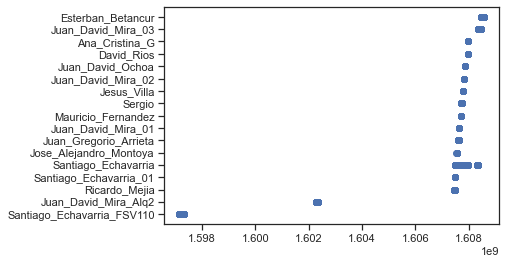

In [15]:
plt.scatter(x=mixed_operation.timestamp2, y=mixed_operation.user_id)

# Segmentation

In [18]:
def gen_trace(df):
    try:
        df.drop(columns='Unnamed: 0', inplace=True)
        df.drop(columns='id', inplace=True)
    except KeyError:
        pass
    trace_id = 1
    aux_trace_id = -1
    trace_array = np.array([])
    suma = 0
    old_name = ''

    for _, row in df.iterrows():
    #for index, row in test.iterrows():
        suma = suma + row['run']
        #row['slope']
        trace_array = np.append(trace_array, aux_trace_id)
        nan = (row['name'] != row['name'])
        
        # Si recorre mas de 300 metros - cambiele el id del segmento actual de aux a definitivo para que se tenga en cuenta
        if suma >=1200:   # 800
            trace_array = np.where(trace_array == aux_trace_id, trace_id, trace_array)
            
        # Si cambia de vía - empiece un nuevo tramo se escoge 1200 para ver cambios en consumo
        if suma >=1200 or (old_name != row['name'] and not nan) or row['operative_state'] == 3:  # pendiente   #1000
        #if suma >=1100: # or (old_name != row['name'] and not nan):  # pendiente
            suma = 0
            trace_id += 1
            aux_trace_id -= 1

        old_name = row['name']

    print(trace_array)
    try:
        df.drop(["trace_id"], axis=1, inplace=True)
    except KeyError:
        pass
    df.insert(2, "trace_id", trace_array, True)
   
    return df

In [19]:
mixed_operation_trace = gen_trace(mixed_operation)

[-1.000e+00  2.000e+00  2.000e+00 ... -5.663e+03 -5.663e+03 -5.663e+03]


# Relacion entre pedal de aceleración y potencia


Corr with power =  0.7611497846073747
P value =  9.73013158955793e-144
Corr with current =  0.34712148500577955
P value =  8.411064548088247e-23
Corr with acc =  0.0024449031014668124
P value =  0.9465275387034696
len =  755


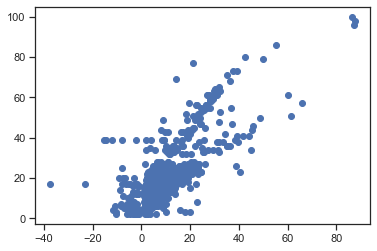

In [20]:
FRV020 = mixed_operation_trace[
    (mixed_operation_trace['vehicle_id'] == 'FRV020') &
    ((mixed_operation_trace['power_kw'] < -1) | (mixed_operation_trace['power_kw'] > 1)) &
    (mixed_operation_trace['throttle'] > 1) &
    ((mixed_operation_trace['throttle'] < 29) | (mixed_operation_trace['throttle'] > 31))]
FRV020_esteban = FRV020[FRV020['user_id'] == 'Esteban_Betancur']
plt.figure()
plt.scatter(x=FRV020['power_kw'], y=FRV020['throttle'])

#Correlacion
corr_coef, p_value = stats.pearsonr(FRV020['power_kw'].to_numpy(), FRV020['throttle'])
print('Corr with power = ',corr_coef)
print('P value = ',p_value)

corr_coef_curr, p_value_curr = stats.pearsonr(FRV020['current'].to_numpy(), FRV020['throttle'])
print('Corr with current = ',corr_coef_curr)
print('P value = ',p_value_curr)

corr_coef_acc, p_value_acc = stats.pearsonr(FRV020['mean_acc'].to_numpy(), FRV020['throttle'])
print('Corr with acc = ',corr_coef_acc)
print('P value = ',p_value_acc)
print('len = ',len(FRV020))

In [22]:
classifier_df = mixed_operation_trace[mixed_operation_trace['trace_id'] > 0]
print(len(classifier_df))

traces = classifier_df.groupby(['trace_id'])
len(traces)

10879


727

In [154]:
from scipy.stats import skew
    

def peak_features(var):

    # Promedio de valor absoluto de la aceleración
    mean_val = np.mean(var)
    prom_abs = np.mean(np.absolute(var))
    std = np.std(var)
    max_val = np.max(var)
    min_val = np.min(var)
    return mean_val, prom_abs, std, max_val, min_val, skew(var)


def feature_extraction(trace):
    trace['cumulative_distance'] = trace['run'].cumsum()

    # Picos aceleraciones y frenadas
    acc = trace['mean_acc'].to_numpy()
    mean_acc, prom_abs_acc, std_acc, max_acc, min_acc, skew_acc = peak_features(acc)  

    # Derivative of da/dt to find Jerk  - partir en otra función
    time_indexed_acc = pd.Series(acc, index=trace['timestamp2'])
    jerk = time_indexed_acc.diff().to_numpy()

    # Picos corriente
    current = trace['current'].to_numpy()
    mean_current, prom_abs_current, std_current, max_current, min_current, skew_current = peak_features(current)  
    slope = np.mean(trace['slope'])

    power_nominal_zoe = 65.6216
    power_nominal_leaf = 81.2813
    if trace['vehicle_id'].iloc[0] == 'FRV020':
        power_nominal = power_nominal_leaf
    else:
        power_nominal = power_nominal_zoe
        
    mass = trace['mass'].iloc[0]

    # Medidas de potencia específica
    power = trace['power_kw'].to_numpy()
    mean_power, prom_abs_power, std_power, max_power, min_power, skew_power = peak_features(power)  


    # With trip energy used
    consumption1 = trace['energy'].iloc[-1] - trace['energy'].iloc[0]

    # With battery capacity
    consumption2 = trace['capacity'].iloc[0] - trace['capacity'].iloc[-1]

    # With power integration
    consumption3 = integrate.cumtrapz(trace['power_kw'], trace['timestamp2'])
    consumption3 = (consumption3[-1] - consumption3[0]) / 3600

    if slope < 0:
        consumption1 = consumption3

    # Average specific consumption kWh / kg
    # consumption = (0.23* consumption1 + 0.3*consumption2 + 0.47*consumption3) / 1
    consumption = (consumption2 + consumption3) /2 
    kms = trace['cumulative_distance'].iloc[-1] / 1000
    
    # kWh / kg*km  --> Energy per km per kg
    consumption_per_km = consumption / kms
    
    speed = trace['speed'].to_numpy()
    mean_speed, prom_abs_speed, std_speed, max_speed, min_speed, skew_speed = peak_features(speed)  
    
    time = trace['timestamp2'].iloc[-1] - trace['timestamp2'].iloc[0]

    # This indicator detects traffic (including red lights)
    stopped_time = 0
    old_time = trace['timestamp2'].iloc[0]
    prev = False
    
    for index, row in trace[['timestamp2', 'mean_speed']].iterrows():
        if row['mean_speed'] < 2:
            if prev:
                stopped_time += row['timestamp2'] - old_time

            old_time = row['timestamp2']
            prev = True
        else:
            prev = False
    idle_time = stopped_time / time
    
    traffic_factor = mean_speed / std_speed if std_speed != 0 else 0

    mean_temp = trace['ext_temp'].mean()
    nominal_speed = trace['speed_kph'].iloc[0]

    speed_ind = nominal_speed / np.max(trace['speed'])
    try:
        test_id = trace['test_id'].iloc[0]
    except KeyError:
        test_id = 0

#     a, n_lights = calc_shortest_path(OSM.G, trace['latitude'].iloc[0], trace['longitude'].iloc[0],
#                                      trace['latitude'].iloc[-1], trace['longitude'].iloc[-1])

    return [
        mean_acc, prom_abs_acc, std_acc, max_acc, min_acc, skew_acc,
        mean_current, prom_abs_current, std_current, max_current, min_current, skew_current,
        mean_power, prom_abs_power, std_power, max_power, min_power, skew_power,
        mean_speed, prom_abs_speed, std_speed, max_speed, min_speed, skew_speed,
        kms, consumption_per_km, consumption,
        trace['highway'].iloc[0], slope, nominal_speed, 
        trace['soc'].mean(),
        mean_temp, time, idle_time,
        traffic_factor, trace['user_id'].iloc[0], trace['vehicle_id'].iloc[0], speed_ind, test_id,
        trace['timestamp'].iloc[-1],  trace['mass'].iloc[-1], trace['odometer'].iloc[-1]
]


def generate_features_df(lst):
    cols = [
        'mean_acc', 'prom_abs_acc', 'std_acc', 'max_acc', 'min_acc', 'skew_acc',
        'mean_current', 'prom_abs_current', 'std_current', 'max_current', 'min_current', 'skew_current',
        'mean_power', 'prom_abs_power', 'std_power', 'max_power', 'min_power', 'skew_power',
        'mean_speed', 'prom_abs_speed', 'std_speed', 'max_speed', 'min_speed', 'skew_speed',
        'kms', 'consumption_per_km', 'consumption', 'highway', 'slope', 'nominal_speed', 
        'mean_soc', 'mean_temp', 'time', 'idle_time', 'traffic_factor', 'user_id', 'vehicle_id',
        'speed_ind', 'test_id', 'end_time', 'mass', 'end_odometer'
    ]
        

    return pd.DataFrame(lst, columns=cols)



In [160]:
lst = []
for index, trace in traces:
    if index > 0 and len(trace) > 1:
        lst.append(feature_extraction(trace))

features = generate_features_df(lst)
features


<ipython-input-154-cea1ad0ba1c1>:92: RuntimeWarning: divide by zero encountered in double_scalars
  speed_ind = nominal_speed / np.max(trace['speed'])


,mean_acc,prom_abs_acc,std_acc,max_acc,min_acc,skew_acc,mean_current,prom_abs_current,std_current,max_current,...,time,idle_time,traffic_factor,user_id,vehicle_id,speed_ind,test_id,end_time,mass,end_odometer
0,0.052500,0.098409,0.212978,0.75,-0.42,1.517153,12.704545,14.125000,24.715384,97.50,...,316.0,0.667722,0.633915,Santiago_Echavarria_FSV110,FSV110,0.983607,0,2020-08-11 12:02:18,1624,2462.0
1,-0.027000,0.213000,0.277491,0.44,-0.62,-0.410498,50.300000,58.400000,31.141170,73.00,...,69.0,0.000000,8.084061,Santiago_Echavarria_FSV110,FSV110,0.895522,0,2020-08-11 12:03:35,1624,2464.0
2,-0.018182,0.172727,0.245350,0.42,-0.55,-0.570287,53.409091,53.409091,15.654390,75.00,...,82.0,0.000000,8.271389,Santiago_Echavarria_FSV110,FSV110,0.882353,0,2020-08-11 12:04:59,1624,2465.0
3,0.051667,0.308333,0.346502,0.67,-0.39,0.217496,58.770833,61.895833,36.023641,113.00,...,83.0,0.000000,7.079368,Santiago_Echavarria_FSV110,FSV110,0.923077,0,2020-08-11 12:06:22,1624,2466.0
4,-0.112143,0.200714,0.336965,0.23,-1.14,-2.049238,48.196429,50.160714,18.693529,68.50,...,91.0,0.000000,5.738352,Santiago_Echavarria_FSV110,FSV110,1.034483,0,2020-08-11 12:08:01,1624,2467.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,-0.154545,0.376364,0.462491,0.62,-1.16,-0.488501,12.120000,23.310909,28.286916,72.50,...,48.0,0.000000,12.837639,Esterban_Betancur,FRV020,0.833333,0,2020-12-20 11:50:40,1692,1008.0
717,-0.276667,0.626667,0.681950,1.05,-1.22,0.760791,20.446667,43.136667,53.006525,120.00,...,30.0,0.000000,7.088449,Esterban_Betancur,FRV020,1.066667,0,2020-12-20 11:53:25,1692,1008.0
718,0.176364,0.449091,0.708568,2.39,-1.26,1.259826,9.673182,17.424091,26.822981,86.67,...,177.0,0.000000,1.141256,Esterban_Betancur,FRV020,1.025641,0,2020-12-20 11:56:31,1692,1008.0
719,0.019143,0.318571,0.445456,1.30,-1.00,0.422675,6.082286,10.430857,15.874577,47.06,...,189.0,0.015873,1.411869,Esterban_Betancur,FRV020,0.847458,0,2020-12-20 11:59:45,1692,1008.0


In [156]:
bc = features.copy()
#features=bc.copy()]]
features.mean_temp.fillna(value=np.mean(features.mean_temp), inplace=True)

In [161]:
from sklearn.preprocessing import LabelEncoder  
features = features[features['kms'] <= 1.6]
# features = features[(features['max_current'] < 250) ]

# #features = features[(features['traffic_factor'] < 45) ]

# # Cuando es cono 1200 mts
features = features[features['consumption'] < 1]

# # Cuando es con 300mts
# #features = features[(features['consumption'] > -0.15) & (features['consumption'] < 0.4)]

# #features = features[(features['consumption_per_km'] < 0.8) ]

# features = features[features['std_acc'] != 0]

# # Se eliminan los datos que no tengan error de medición de potencia
# features = features[features['max_power'] != 0]

# #Solamente Zoe
# features = features[(features['vehicle_id'] != 'FRV020') & (features['vehicle_id'] != 'FVQ731')]

# print(len(features))
# features = features[(features['consumption_per_km'] > -4) | (features['consumption_per_km'] < 1) ].dropna()
# print(len(features))

# # le = LabelEncoder()
# # features['highway_enc'] = le.fit_transform(features['highway'])
features['slope_cat'] = pd.cut(features["slope"], np.arange(-10,10.1,2.5) )
features['slope_cat'] = features['slope_cat'].astype('string')

# # Wh/km
# features['consumption_per_km'] = features['consumption_per_km']

# print('equal to 0 =',len(features[features['consumption'] == 0]))
# print('different from 0 =', len(features[features['consumption'] != 0]))

features.corr()['consumption'].sort_values()


min_acc              -0.220282
traffic_factor       -0.193093
skew_acc             -0.115377
mean_soc             -0.092825
mean_acc             -0.078008
speed_ind            -0.071224
skew_power           -0.066545
min_speed            -0.038680
nominal_speed        -0.023070
skew_current          0.000085
idle_time             0.011447
prom_abs_speed        0.021753
mean_speed            0.021753
kms                   0.041101
end_odometer          0.043312
mass                  0.044693
skew_speed            0.089077
max_acc               0.102714
time                  0.111345
max_speed             0.136513
mean_temp             0.166512
std_speed             0.173801
std_acc               0.212869
prom_abs_acc          0.239967
min_power             0.299678
std_current           0.318240
std_power             0.386588
min_current           0.410184
max_current           0.444593
prom_abs_current      0.467934
prom_abs_power        0.479020
max_power             0.637073
mean_cur

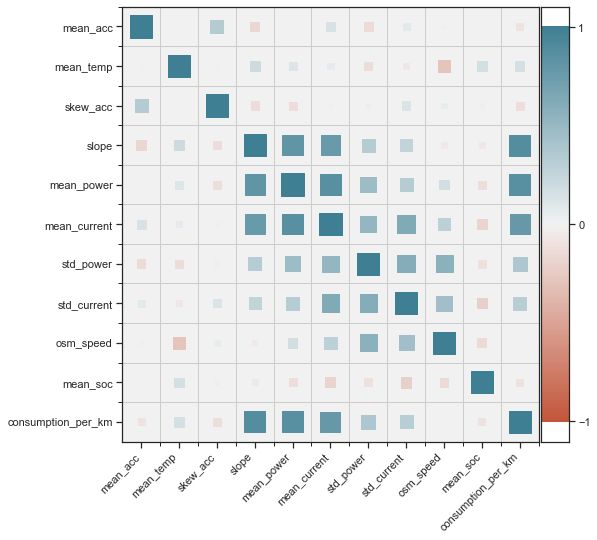

In [168]:
heat_cols = [
    'mean_acc', 'mean_temp',
    'skew_acc', 'slope',
    'mean_power','mean_current', 'std_power','std_current',
    'osm_speed', 'mean_soc',
    'consumption_per_km'
]

a = features.copy()
a = a.rename(columns={'mean_speed':'osm_speed'})
corr=a[heat_cols].corr()
plt.figure(figsize=(8,8))
corrplot(corr.sort_values(['slope']), size_scale=500);

In [77]:
features.to_csv(app.root_path+'/DataBackup/features_v2.csv', index=False)

## Empezar con features desde aca

In [116]:
features = pd.read_csv(app.root_path+'/DataBackup/features_v2.csv')


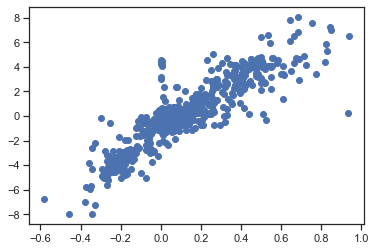

In [117]:
plt.scatter(x=features.consumption, y=features.slope)

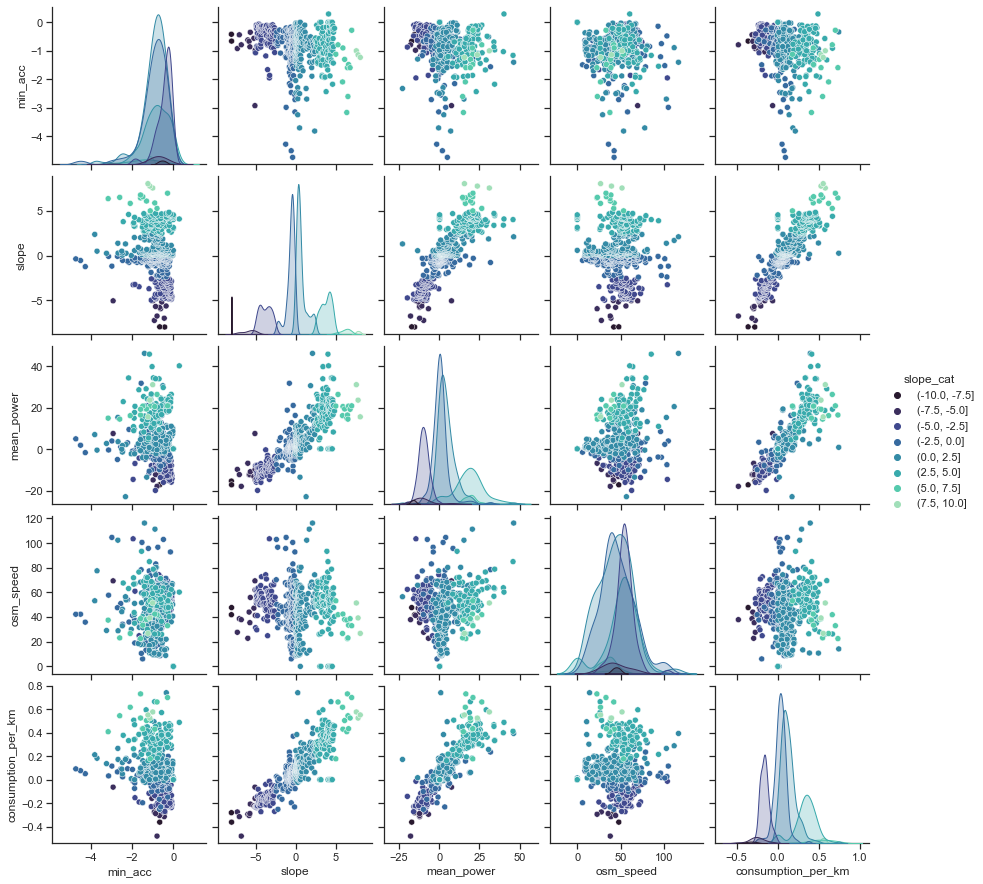

In [165]:
sns.pairplot(a.dropna().sort_values(['slope']), hue='slope_cat', palette='mako', vars=[
    'min_acc',
    'slope',
    'mean_power',
    'osm_speed',
    'consumption_per_km'
], kind= 'scatter')

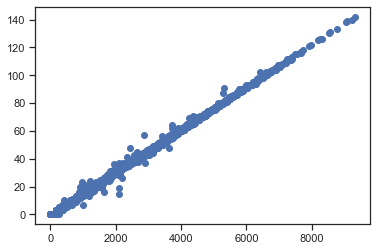

In [106]:
rpm = new_df[new_df.rpm > 0]
plt.scatter(x=rpm.rpm, y=rpm.speed)


# To implement - pace during route
### TellsF the user if his current rate is lower or upper to the estimated

In [107]:
features.user_id.unique()

array(['Santiago_Echavarria_FSV110', 'Juan_David_Mira_Alq2',
       'Ricardo_Mejia', 'Santiago_Echavarria_01', 'Santiago_Echavarria',
       'Jose_Alejandro_Montoya', 'Juan_Gregorio_Arrieta',
       'Juan_David_Mira_01', 'Mauricio_Fernandez', 'Sergio',
       'Jesus_Villa', 'Juan_David_Mira_02', 'Juan_David_Ochoa',
       'David_Rios', 'Ana_Cristina_G', 'Juan_David_Mira_03',
       'Esterban_Betancur'], dtype=object)

<ipython-input-108-c756d1f0f2c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['slope_cat'] = pd.cut(x["slope"], np.arange(-5.1,5.2,3.4) )


['Santiago_Echavarria_FSV110' 'Juan_David_Mira_Alq2' 'Ricardo_Mejia'
 'Santiago_Echavarria_01' 'Santiago_Echavarria' 'Jose_Alejandro_Montoya'
 'Juan_Gregorio_Arrieta' 'Juan_David_Mira_01' 'Mauricio_Fernandez'
 'Sergio' 'Jesus_Villa' 'Juan_David_Mira_02' 'Juan_David_Ochoa'
 'David_Rios' 'Ana_Cristina_G' 'Juan_David_Mira_03' 'Esterban_Betancur']


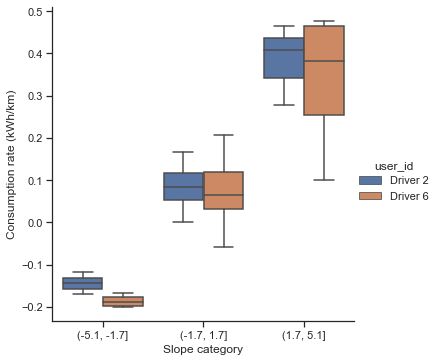

In [108]:
x=features[(features['slope'] > -5) & (features['slope'] < 5)]
x['slope_cat'] = pd.cut(x["slope"], np.arange(-5.1,5.2,3.4) )

print(x.user_id.unique())
x = x[x['user_id'] != 'Juan_David_Mira_01']
x = x[x['user_id'] != 'Santiago_Echavarria_FSV110']

x = x[x['user_id'] != 'Santiago_Echavarria']
x = x[x['user_id'] != 'Santiago_Echavarria_01']  # Por ser muy atipico
x = x[x['user_id'] != 'Juan_David_Mira_01']
x = x[x['user_id'] != 'Juan_David_Mira_02']
x = x[x['user_id'] != 'Juan_David_Mira_03']
x = x[x['user_id'] != 'Juan_David_Mira_Alq2']

x.loc[x['user_id'] == 'Ricardo_Mejia', 'user_id'] = 'Driver 0'
x.loc[x['user_id'] == 'Jose_Alejandro_Montoya', 'user_id'] = 'Driver 1'
x.loc[x['user_id'] == 'Juan_Gregorio_Arrieta', 'user_id'] = 'Driver 2'
x.loc[x['user_id'] == 'Mauricio_Fernandez', 'user_id'] = 'Driver 3'
x.loc[x['user_id'] == 'Sergio', 'user_id'] = 'Driver 4'
x.loc[x['user_id'] == 'Jesus_Villa', 'user_id'] = 'Driver 5'
x.loc[x['user_id'] == 'Juan_David_Ochoa', 'user_id'] = 'Driver 6'
x.loc[x['user_id'] == 'David_Rios', 'user_id'] = 'Driver 7'
x.loc[x['user_id'] == 'Ana_Cristina_G', 'user_id'] = 'Driver 8'
x.loc[x['user_id'] == 'Esterban_Betancur', 'user_id'] = 'Driver 9'


x.slope_cat = x.slope_cat.astype(str)
x = x[(x['user_id'] == 'Driver 2') | (x['user_id'] == 'Driver 6')]
x.rename(columns={"mean_power": "MBPO (kW)","mean_speed": "Nominal speed (km/h)",
                                       'consumption_per_km': 'Consumption rate (kWh/km)','slope_cat':'Slope category'}, inplace=True)


sns.catplot(x='Slope category', y='Consumption rate (kWh/km)', hue='user_id', data=x.sort_values(by=['user_id', 'slope' ]), kind='box')

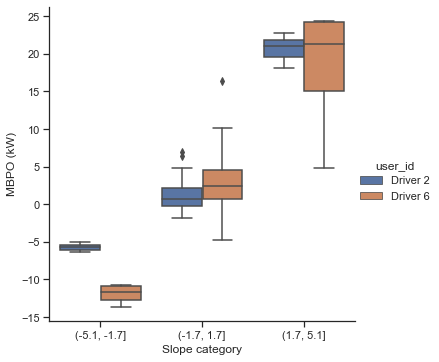

In [90]:
sns.catplot(x='Slope category', y="MBPO (kW)", hue='user_id', data=x.sort_values(by=['user_id', 'slope' ]), kind='box')

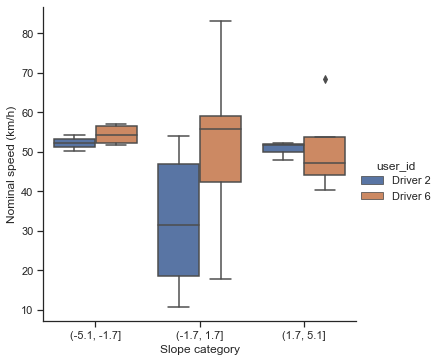

In [91]:
sns.catplot(x='Slope category', y='Nominal speed (km/h)', hue='user_id', data=x.sort_values(by=['user_id', 'slope' ]), kind='box')

In [95]:
from   scipy import stats

x1=x[(x['slope'] > 2) ]
x2=x[(x['slope'] > -2) & (x['slope'] <= 2)]

stat, p, med, tbl = stats.median_test(x1['Consumption rate (kWh/km)'][(x1['user_id'] == 'Driver 2')],
                                      x1['Consumption rate (kWh/km)'][(x1['user_id'] == 'Driver 6')])
print('p = ' + str(p), '\n')

# Different slope group
t2, p2 = stats.ttest_ind(x1['Consumption rate (kWh/km)'][(x1['user_id'] == 'Driver 2')] ,
                         x2['Consumption rate (kWh/km)'][x2['user_id'] == 'Driver 6' ])
print('For same user - different slope group')
print('t = ' + str(t2))
print('p = ' + str(p2), '\n')

# Same slope group > 1.7
t2, p2 = stats.ttest_ind(x1['Consumption rate (kWh/km)'][(x1['user_id'] == 'Driver 2')] ,
                         x1['Consumption rate (kWh/km)'][x1['user_id'] == 'Driver 6' ])
print('For 2 different users - slope group > 2')
print('t = ' + str(t2))
print('p = ' + str(p2), '\n')

# Same slope group > 1.7
t2, p2 = stats.ttest_ind(x1['Nominal speed (km/h)'][(x1['user_id'] == 'Driver 2')] ,
                         x1['Nominal speed (km/h)'][x1['user_id'] == 'Driver 6' ])
print('Nominal speed (km/h) For 2 different users - slope group > 2')
print('t = ' + str(t2))
print('p = ' + str(p2), '\n')

# Same slope group > 1.7
t2, p2 = stats.ttest_ind(x1['MBPO (kW)'][(x1['user_id'] == 'Driver 2')] ,
                         x1['MBPO (kW)'][x1['user_id'] == 'Driver 6' ])
print('MBPO (kW) For 2 different users - slope group > 2')
print('t = ' + str(t2))
print('p = ' + str(p2), '\n')

p = 0.7408568142938687 

For same user - different slope group
t = 7.342105350759149
p = 1.8099632787115323e-07 

For 2 different users - slope group > 2
t = 0.424050026782221
p = 0.689154707697324 

Nominal speed (km/h) For 2 different users - slope group > 2
t = -0.02190351379570013
p = 0.983372154722483 

MBPO (kW) For 2 different users - slope group > 2
t = 0.4831998295634717
p = 0.6493695623751345 



# Separate 25 km for measuring and rest for test (for the test cases)


In [118]:
features['cumdist1'] = features[(features['user_id'] == 'Santiago_Echavarria') ].kms.cumsum()  #features['cumdist'] 
features.loc[features['cumdist1'] > 70, 'user_id'] = 'Santiago_Echavarria_test'
features.loc[features['cumdist1'] < 70, 'user_id'] = 'Santiago_Echavarria_measure'

### Se utiliza para train los datos de las pruebas contraladas de todos los usuariois

In [119]:
train = features[(features['user_id'] != 'Santiago_Echavarria_test') &
                 (features['user_id'] != 'Santiago_Echavarria_measure')]
test = features.loc[features.index.difference(train.index)]


In [120]:
train.user_id.unique()

array(['Santiago_Echavarria_FSV110', 'Juan_David_Mira_Alq2',
       'Ricardo_Mejia', 'Santiago_Echavarria_01',
       'Jose_Alejandro_Montoya', 'Juan_Gregorio_Arrieta',
       'Juan_David_Mira_01', 'Mauricio_Fernandez', 'Sergio',
       'Jesus_Villa', 'Juan_David_Mira_02', 'Juan_David_Ochoa',
       'David_Rios', 'Ana_Cristina_G', 'Juan_David_Mira_03',
       'Esterban_Betancur'], dtype=object)

# Slope groups

In [121]:
slope_groups = train.groupby(by=["slope_cat"])

mean_features_by_slope = slope_groups[['mean_power', 'min_acc', 'consumption_per_km']].mean().reset_index()
mean_features_by_slope.rename(columns={
    "mean_power": "mean_power_by_slope", 
    "min_acc": "mean_min_acc",
    'consumption_per_km': 'mean_consumption_per_km',
    'slope':'slope_cat'
}, inplace=True)

mean_features_by_slope.to_csv('UserDrivingData/mean_features_by_slope.csv', index=False)


#Se lee la que se saco con segmentos de 300m.
mean_features_by_slope = pd.read_csv('UserDrivingData/mean_features_by_slope.csv')
mean_features_by_slope['slope_cat'] = mean_features_by_slope['slope_cat'].astype('string')


train_cons = pd.merge(left=train, right=mean_features_by_slope,
                      left_on='slope_cat', right_on='slope_cat')

train_cons['user_id'].unique()

array(['Santiago_Echavarria_FSV110', 'Juan_David_Mira_Alq2',
       'Ricardo_Mejia', 'Santiago_Echavarria_01',
       'Jose_Alejandro_Montoya', 'Juan_Gregorio_Arrieta',
       'Juan_David_Mira_01', 'Mauricio_Fernandez', 'Sergio',
       'Jesus_Villa', 'Juan_David_Mira_02', 'Juan_David_Ochoa',
       'David_Rios', 'Ana_Cristina_G', 'Juan_David_Mira_03',
       'Esterban_Betancur'], dtype=object)

# User and slope groups

In [123]:
user_slope_groups = train.groupby(by=['slope_cat', 'user_id'])
mean_features_by_user_and_slope = user_slope_groups[['mean_power', 'min_acc', 'consumption_per_km']].mean().reset_index()
mean_features_by_user_and_slope.rename(columns={
    "mean_power": "mean_power_usr",
    "min_acc": "mean_min_acc_usr",
    'consumption_per_km': 'mean_consumption_per_km_usr'
}, inplace=True)

mean_features_by_user_and_slope
mean_features_by_user_and_slope.to_csv('UserDrivingData/mean_features_by_user_and_slope.csv', index=False)


#Se lee la que se saco con segmentos de 300m.
mean_features_by_user_and_slope = pd.read_csv('UserDrivingData/mean_features_by_user_and_slope.csv')
mean_features_by_user_and_slope['slope_cat'] = mean_features_by_user_and_slope['slope_cat'].astype('string')

train_cons = pd.merge(left=train_cons, right=mean_features_by_user_and_slope,
                              left_on=['user_id', 'slope_cat'], right_on=['user_id', 'slope_cat'])

# Esta tabla se sacó con segmentos de 300m
mean_features_by_user_and_slope.tail(60)

,slope_cat,user_id,mean_power_usr,mean_min_acc_usr,mean_consumption_per_km_usr
10,"(-2.5, 0.0]",Juan_Gregorio_Arrieta,-0.618424,-1.006667,0.020451
11,"(-2.5, 0.0]",Mauricio_Fernandez,-1.809018,-0.822222,0.018010
12,"(-2.5, 0.0]",Ricardo_Mejia,0.312449,-0.540000,0.011797
13,"(-2.5, 0.0]",Santiago_Echavarria_01,6.145579,-1.013750,0.068506
14,"(-2.5, 0.0]",Santiago_Echavarria_FSV110,1.702068,-0.905714,0.045869
15,"(-2.5, 0.0]",Sergio,0.246073,-0.839286,0.037600
16,"(-5.0, -2.5]",Ana_Cristina_G,-7.655444,-0.840000,-0.214334
17,"(-5.0, -2.5]",David_Rios,-10.281630,-0.373333,-0.160224
18,"(-5.0, -2.5]",Esterban_Betancur,-10.141663,-0.750000,-0.172669
19,"(-5.0, -2.5]",Jose_Alejandro_Montoya,-8.258067,-0.272500,-0.167208


In [125]:
# cols = ['max_power','slope']
cols = ['mean_power_usr', 'mean_min_acc_usr', 'mean_speed', 'slope']
model_ft = train_cons[cols]
selected_ft = train_cons[['mean_power_usr', 'mean_min_acc_usr', 'mean_speed', 'slope', 'consumption_per_km']]

print(len(selected_ft))

selected_ft.corr()

629


,mean_power_usr,mean_min_acc_usr,mean_speed,slope,consumption_per_km
mean_power_usr,1.000000,-0.267806,-0.020825,0.925231,0.857660
mean_min_acc_usr,-0.267806,1.000000,-0.031887,-0.314168,-0.295193
mean_speed,-0.020825,-0.031887,1.000000,-0.054162,0.021038
slope,0.925231,-0.314168,-0.054162,1.000000,0.887983
consumption_per_km,0.857660,-0.295193,0.021038,0.887983,1.000000


# Scaling

In [145]:
from sklearn.preprocessing import MinMaxScaler
from pickle import dump

# For other sklearn models differente than linear regression
scaler = MinMaxScaler()
scaler.fit(train_cons[selected_ft.columns])

# For linear regression
scaler_lm = MinMaxScaler()
scaler_lm.fit(train_cons[model_ft.columns])

train_scaled = pd.DataFrame(scaler.transform(train_cons[selected_ft.columns]), columns=selected_ft.columns)

train_lm_scaled = pd.DataFrame(scaler_lm.transform(train_cons[model_ft.columns]), columns=model_ft.columns)
train_lm_scaled['consumption_per_km'] = train_scaled['consumption_per_km']

# Linear Model

In [127]:
formula = 'consumption_per_km ~ mean_power_usr + mean_min_acc_usr + mean_speed + slope -1' # 0.84
#formula = 'consumption_per_km ~ slope + max_power -1' # 0.84


lm_consumo = ols(formula = formula, data = train_cons[selected_ft.columns]).fit()
print(lm_consumo.summary())

                                 OLS Regression Results                                
Dep. Variable:     consumption_per_km   R-squared (uncentered):                   0.837
Model:                            OLS   Adj. R-squared (uncentered):              0.836
Method:                 Least Squares   F-statistic:                              804.7
Date:                Thu, 27 May 2021   Prob (F-statistic):                   7.92e-245
Time:                        23:15:43   Log-Likelihood:                          664.86
No. Observations:                 629   AIC:                                     -1322.
Df Residuals:                     625   BIC:                                     -1304.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

<Figure size 1440x1440 with 0 Axes>

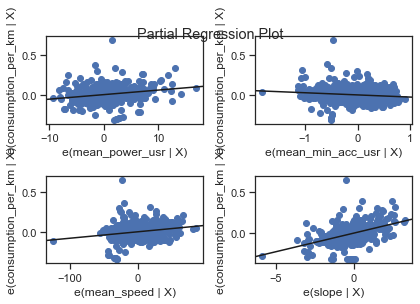

In [128]:
plt.figure(figsize =[20,20])
fig=sm.graphics.plot_partregress_grid(lm_consumo)


# Test case :

Aqui dividimos el set de validación en 2 partes: Santiago_Echavarria_measure y Santiago_Echavarria_test.
Santiago_Echavarria_measure contiene 25 km de manejo y se utilizará para determinar los promedios de las conductas de usuario. El conjunto Santiago_Echavarria_test contiene los siguientes kilómetros y será el conjunto donde se aplicará el algoritmo basado en los promedios calculados de Santiago_Echavarria_measure.


In [129]:


test_test = test[test['user_id']=='Santiago_Echavarria_test']
test_measure = test[test['user_id']=='Santiago_Echavarria_measure']


print(len(test_test))
print(len(test_measure))


slope_user_groups = test_measure.groupby(by=['slope_cat', 'user_id'])
mean_features_by_user_and_slope = slope_user_groups[['mean_power', 'min_acc', 'consumption_per_km']].mean().reset_index()
mean_features_by_user_and_slope.rename(columns={
    "mean_power": "mean_power_usr",
    "min_acc": "mean_min_acc_usr",
    'consumption_per_km': 'mean_consumption_per_km_usr'
}, inplace=True)

mean_features_by_user_and_slope.user_id = 'Santiago_Echavarria_test'
test_test = pd.merge(how='left', left=test_test, right=mean_features_by_user_and_slope,
                              left_on=['user_id', 'slope_cat'], right_on=['user_id', 'slope_cat'])
test_test

8
55


,mean_acc,prom_abs_acc,std_acc,max_acc,min_acc,skew_acc,mean_current,prom_abs_current,std_current,max_current,...,speed_ind,test_id,end_time,mass,end_odometer,slope_cat,cumdist1,mean_power_usr,mean_min_acc_usr,mean_consumption_per_km_usr
0,0.000909,0.448182,0.588565,1.03,-1.31,-0.502120,52.726364,62.648182,61.610605,200.83,...,0.446429,0,2020-12-18 15:18:49,1626,748.0,"(2.5, 5.0]",70.758006,18.560005,-0.952222,0.352160
1,-0.095000,0.701000,0.800903,1.04,-1.18,0.160915,-23.839000,42.783000,46.626471,44.79,...,0.581395,0,2020-12-18 15:22:09,1626,748.0,"(-5.0, -2.5]",72.328361,-12.473495,-0.298889,-0.206881
2,-0.109286,0.430714,0.625830,0.67,-1.86,-1.499028,-38.607143,40.797143,56.950161,15.33,...,0.675676,0,2020-12-18 15:23:17,1626,748.0,"(-5.0, -2.5]",73.600177,-12.473495,-0.298889,-0.206881
3,0.236364,0.380000,0.513124,1.43,-0.38,1.057402,1.304545,50.950000,65.222948,151.00,...,0.413223,0,2020-12-18 15:24:21,1626,748.0,"(-5.0, -2.5]",74.837188,-12.473495,-0.298889,-0.206881
4,-0.205000,0.385000,0.438092,0.36,-0.87,-0.336818,-37.875000,37.875000,36.037431,-7.00,...,0.684932,0,2020-12-18 15:25:39,1626,748.0,"(-5.0, -2.5]",76.042728,-12.473495,-0.298889,-0.206881
5,-0.042308,0.270000,0.331782,0.57,-0.55,-0.099723,-3.150000,12.043846,18.617060,19.86,...,0.722892,0,2020-12-18 15:41:56,1626,748.0,"(-2.5, 0.0]",77.290244,0.211450,-0.886000,0.000672
6,0.067292,0.282292,0.377843,0.89,-0.98,-0.329823,4.877083,5.892083,8.443526,38.92,...,1.538462,0,2020-12-18 15:59:03,1626,748.0,"(0.0, 2.5]",78.502274,4.169887,-0.715000,0.140953
7,0.010000,0.381875,0.493438,1.32,-0.95,0.557153,8.166875,11.676250,16.779621,68.25,...,1.304348,0,2020-12-18 16:18:36,1626,748.0,"(0.0, 2.5]",79.708626,4.169887,-0.715000,0.140953


In [130]:
test_test = pd.merge(how='left', left=test_test, right=mean_features_by_slope,
                     left_on=['slope_cat'], right_on=['slope_cat'])

test_test


,mean_acc,prom_abs_acc,std_acc,max_acc,min_acc,skew_acc,mean_current,prom_abs_current,std_current,max_current,...,mass,end_odometer,slope_cat,cumdist1,mean_power_usr,mean_min_acc_usr,mean_consumption_per_km_usr,mean_power_by_slope,mean_min_acc,mean_consumption_per_km
0,0.000909,0.448182,0.588565,1.03,-1.31,-0.502120,52.726364,62.648182,61.610605,200.83,...,1626,748.0,"(2.5, 5.0]",70.758006,18.560005,-0.952222,0.352160,18.591871,-0.757093,0.328237
1,-0.095000,0.701000,0.800903,1.04,-1.18,0.160915,-23.839000,42.783000,46.626471,44.79,...,1626,748.0,"(-5.0, -2.5]",72.328361,-12.473495,-0.298889,-0.206881,-8.998501,-0.402727,-0.158759
2,-0.109286,0.430714,0.625830,0.67,-1.86,-1.499028,-38.607143,40.797143,56.950161,15.33,...,1626,748.0,"(-5.0, -2.5]",73.600177,-12.473495,-0.298889,-0.206881,-8.998501,-0.402727,-0.158759
3,0.236364,0.380000,0.513124,1.43,-0.38,1.057402,1.304545,50.950000,65.222948,151.00,...,1626,748.0,"(-5.0, -2.5]",74.837188,-12.473495,-0.298889,-0.206881,-8.998501,-0.402727,-0.158759
4,-0.205000,0.385000,0.438092,0.36,-0.87,-0.336818,-37.875000,37.875000,36.037431,-7.00,...,1626,748.0,"(-5.0, -2.5]",76.042728,-12.473495,-0.298889,-0.206881,-8.998501,-0.402727,-0.158759
5,-0.042308,0.270000,0.331782,0.57,-0.55,-0.099723,-3.150000,12.043846,18.617060,19.86,...,1626,748.0,"(-2.5, 0.0]",77.290244,0.211450,-0.886000,0.000672,0.421340,-0.883081,0.028696
6,0.067292,0.282292,0.377843,0.89,-0.98,-0.329823,4.877083,5.892083,8.443526,38.92,...,1626,748.0,"(0.0, 2.5]",78.502274,4.169887,-0.715000,0.140953,4.701393,-0.882838,0.125152
7,0.010000,0.381875,0.493438,1.32,-0.95,0.557153,8.166875,11.676250,16.779621,68.25,...,1626,748.0,"(0.0, 2.5]",79.708626,4.169887,-0.715000,0.140953,4.701393,-0.882838,0.125152


In [131]:
test_test[['user_id', 'slope_cat']] = test_test[['user_id', 'slope_cat']].astype('string')

In [67]:
#mean_max_pot_per_user_and_slope['slope_cat'] = mean_max_pot_per_user_and_slope['slope_cat'].astype('string')

In [68]:
# test_consolidated = pd.merge(how='left', left=test_consolidated, right=mean_max_pot_per_user_and_slope,
#                               left_on=['slope_cat', 'user_id'], right_on=['slope_cat', 'user_id'])
# test_consolidated

In [133]:
test_test['mean_power_usr'] = test_test.apply(
    lambda row: row['mean_power_by_slope'] if np.isnan(row['mean_power_usr']) else row['mean_power_usr'],
    axis=1
)
test_test['mean_min_acc_usr'] = test_test.apply(
    lambda row: row['mean_min_acc'] if np.isnan(row['mean_min_acc_usr']) else row['mean_min_acc_usr'],
    axis=1
)
test_test['mean_consumption_per_km_usr'] = test_test.apply(
    lambda row: row['mean_consumption_per_km'] if np.isnan(row['mean_consumption_per_km_usr']) else row['mean_consumption_per_km_usr'],
    axis=1
)
test_test.isna().sum()

mean_acc                       0
prom_abs_acc                   0
std_acc                        0
max_acc                        0
min_acc                        0
skew_acc                       0
mean_current                   0
prom_abs_current               0
std_current                    0
max_current                    0
min_current                    0
skew_current                   0
mean_power                     0
prom_abs_power                 0
std_power                      0
max_power                      0
min_power                      0
skew_power                     0
mean_speed                     0
prom_abs_speed                 0
std_speed                      0
max_speed                      0
min_speed                      0
skew_speed                     0
kms                            0
consumption_per_km             0
consumption                    0
highway                        0
slope                          0
nominal_speed                  0
mean_soc  

In [134]:
print(test_test[cols].isna().sum() )

test_scaled = pd.DataFrame(
    scaler_lm.transform(
        test_test[model_ft.columns]
    ), columns=model_ft.columns)

test_scaled[cols].isna().sum()


mean_power_usr      0
mean_min_acc_usr    0
mean_speed          0
slope               0
dtype: int64


mean_power_usr      0
mean_min_acc_usr    0
mean_speed          0
slope               0
dtype: int64

In [135]:
y_test = pd.DataFrame(
    scaler.transform(
        test_test[selected_ft.columns]
    ), columns=selected_ft.columns
)['consumption_per_km']

predictions = lm_consumo.predict(test_scaled)



### Without scaling

In [136]:
test_test['consumption_per_km'] = test_test['consumption_per_km']
predictions = lm_consumo.predict(test_test[cols])
y_test_lm = test_test['consumption_per_km']

In [137]:
dump(lm_consumo, open('UserDrivingData/linear_model.pkl', 'wb'))

RMSE = 0.07116143413677326
RMSPE = 423.8073089944104
RME = 195.03517679727045
R2 = 0.8486401428363286
max error= 0.11092486980917321


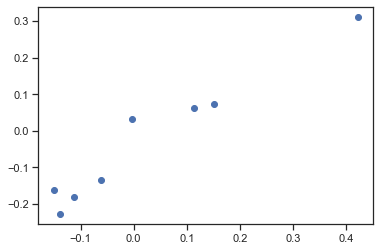

In [138]:
def model_evaluation(y_test, predictions):
    RMSE = np.sqrt(mean_squared_error(y_test, predictions))
    print('RMSE =',RMSE)
    
    rmspe = (np.sqrt(np.mean(np.square((y_test - predictions) / y_test)))) * 100
    print('RMSPE =',rmspe)
    
    rme = np.mean(np.abs((y_test - predictions) / y_test)) * 100
    print('RME =',rme)


    print('R2 =',r2_score(y_test, predictions))
    print('max error=',max(abs(y_test - predictions)))
    plt.figure()
    plt.scatter(x=y_test, y=predictions)

model_evaluation(y_test_lm, predictions)

# Random forest

RMSE = 0.044885001584901656
RMSPE = 9.525379326715688
RME = 8.532452028166503
R2 = 0.9103858460967591
max error= 0.0981916965261338


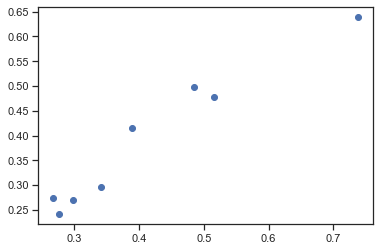

In [139]:
X = train_lm_scaled[cols].values
y = train_lm_scaled['consumption_per_km'].values

# Step 1
# n_estimators=[,,,,,], max_depth=[,,,,,,]

# Curva de aprendizaje
# Variar train size 

# Curva de complejidad
# x cada uno de los parámetros max_depth': 110, 'max_samples': 0.2, 'n_estimators': 45}
randF_regr = RandomForestRegressor(n_estimators=149, max_depth=5,
                                   random_state=0,max_features='auto' , criterion='mse', max_samples = 0.219)

randF_regr.fit(X, y)
y_pred = randF_regr.predict(test_scaled[cols].values)

model_evaluation(y_test, y_pred)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
print("Initialize Grid Search")
param_grid = { 
    'n_estimators': np.arange(5,70,5),
    'max_depth' : np.arange(2,20,2),
    'max_samples' : np.arange(0.1,0.9,0.1)
}
# create and fit a regression model, testing each parameter value

 

model = RandomForestRegressor()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_params_)

# Complexity curves

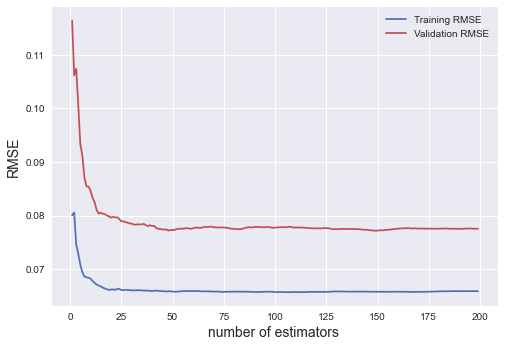

In [167]:
from sklearn.metrics import mean_absolute_error

n_estimators = np.arange(1,200,1)
X_test = test_scaled[cols].values

train_reg_results = []
validation_reg_results = []
train_reg_r2 = []
validation_reg_r2 = []

train_acc = []
val_acc = []
val_r2 = []
train_r2 = []

for estimators in n_estimators:
    reg = RandomForestRegressor(n_estimators = estimators, max_features='auto', max_depth=5, max_samples = 0.219,
                                criterion = 'mse', random_state = 0)
    reg.fit(X, y)
    # Predicting the Traint set results
    y_pred_train = reg.predict(X)
    train_reg_results.append(np.sqrt(mean_squared_error(y, y_pred_train)))

    y_pred = reg.predict(X_test)
    validation_reg_results.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    train_reg_r2.append(mean_absolute_error(y, y_pred_train))

    validation_reg_r2.append(mean_absolute_error(y_test, y_pred))

    #print('R2 =',r2_score(y_test, predictions))

for i in range(len(train_reg_results)):
    train_acc.append(train_reg_results[i])
    val_acc.append(validation_reg_results[i])
    train_r2.append(train_reg_r2[i])
    val_r2.append(validation_reg_r2[i])


plt.figure('Complexity curve')
plt.style.use('seaborn')
plt.plot(n_estimators, train_acc, 'b', label = 'Training RMSE')
plt.plot(n_estimators, val_acc, 'r', label = 'Validation RMSE')
# plt.plot(n_estimators, train_r2, 'c', label = 'Training MAE')
# plt.plot(n_estimators, val_r2, 'y', label = 'Validation MAE')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('number of estimators ', fontsize = 14)
# plt.title('Complexity curves for random forest', fontsize = 18, y = 1.03)
plt.legend()
plt.show()

In [168]:
n_estimators[val_acc.index(min(val_acc))]


149

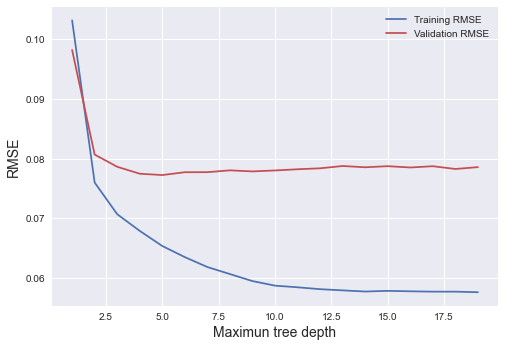

In [160]:
depths = np.arange(1,20,1)
X_test = test_scaled[cols].values

train_reg_results = []
validation_reg_results = []
train_reg_r2 = []
validation_reg_r2 = []

train_acc = []
val_acc = []
val_r2 = []
train_r2 = []

for depth in depths:
    reg = RandomForestRegressor(n_estimators = 48, max_features='auto', max_samples = 0.219,
                                max_depth=depth, criterion = 'mse', random_state = 0, n_jobs=-1)
    reg.fit(X, y)
    # Predicting the Traint set results
    y_pred_train = reg.predict(X)
    train_reg_results.append(np.sqrt(mean_squared_error(y, y_pred_train)))

    y_pred = reg.predict(X_test)
    validation_reg_results.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    train_reg_r2.append(mean_absolute_error(y, y_pred_train))

    validation_reg_r2.append(mean_absolute_error(y_test, y_pred))

    #print('R2 =',r2_score(y_test, predictions))

for i in range(len(train_reg_results)):
    train_acc.append(train_reg_results[i])
    val_acc.append(validation_reg_results[i])
    train_r2.append(train_reg_r2[i])
    val_r2.append(validation_reg_r2[i])


plt.figure('Complexity curve')
plt.style.use('seaborn')
plt.plot(depths, train_acc, 'b', label = 'Training RMSE')
plt.plot(depths, val_acc, 'r', label = 'Validation RMSE')
# plt.plot(n_estimators, train_r2, 'c', label = 'Training MAE')
# plt.plot(n_estimators, val_r2, 'y', label = 'Validation MAE')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Maximun tree depth', fontsize = 14)
# plt.title('Complexity curves for random forest', fontsize = 18, y = 1.03)
plt.legend()
plt.show()

In [161]:
depths[val_acc.index(min(val_acc))]


5

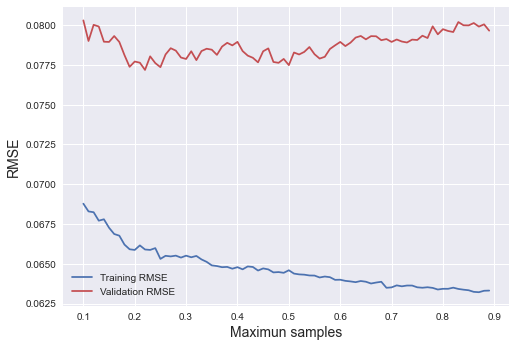

In [162]:
max_samples = np.arange(0.1,0.9,0.01)
X_test = test_scaled[cols].values

train_reg_results = []
validation_reg_results = []
train_reg_r2 = []
validation_reg_r2 = []

train_acc = []
val_acc = []
val_r2 = []
train_r2 = []

for max_sample in max_samples:
    reg = RandomForestRegressor(n_estimators = 48, max_features='auto', max_samples = max_sample,
                                max_depth=5, criterion = 'mse', random_state = 0, n_jobs=-1)
    reg.fit(X, y)
    # Predicting the Traint set results
    y_pred_train = reg.predict(X)
    train_reg_results.append(np.sqrt(mean_squared_error(y, y_pred_train)))

    y_pred = reg.predict(X_test)
    validation_reg_results.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    train_reg_r2.append(mean_absolute_error(y, y_pred_train))

    validation_reg_r2.append(mean_absolute_error(y_test, y_pred))

    #print('R2 =',r2_score(y_test, predictions))

for i in range(len(train_reg_results)):
    train_acc.append(train_reg_results[i])
    val_acc.append(validation_reg_results[i])
    train_r2.append(train_reg_r2[i])
    val_r2.append(validation_reg_r2[i])


plt.figure('Complexity curve')
plt.style.use('seaborn')
plt.plot(max_samples, train_acc, 'b', label = 'Training RMSE')
plt.plot(max_samples, val_acc, 'r', label = 'Validation RMSE')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Maximun samples', fontsize = 14)
# plt.title('Complexity curves for random forest', fontsize = 18, y = 1.03)
plt.legend()
plt.show()

In [163]:
max_samples[val_acc.index(min(val_acc))]

0.21999999999999995

Text(0.5, 0, 'Relative Importance')

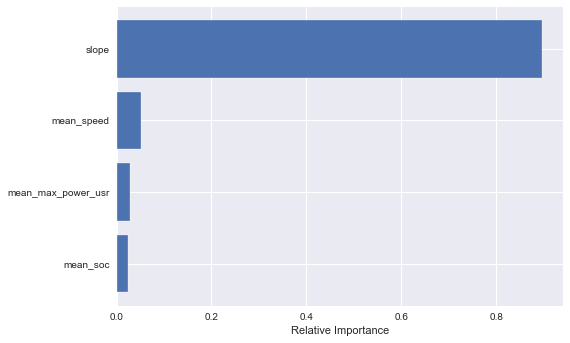

In [520]:
features=train_lm_scaled.columns[[0, 1, 2, 3]]
importances = randF_regr.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
#plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [140]:
dump(randF_regr, open('MachineLearningModels/randomForest_0_3_mean_consumption_maxerr_model.pkl', 'wb'))
dump(scaler, open('MachineLearningModels/scaler.pkl', 'wb'))
dump(scaler_lm, open('MachineLearningModels/scaler_lm.pkl', 'wb'))

# XGBoost

RMSE = 0.051668786051395306
RMSPE = 10.939509516329712
RME = 9.167645534307004
R2 = 0.8812508157216299
max error= 0.12042840182758996


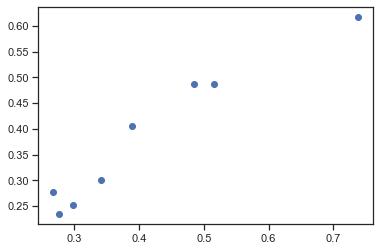

In [141]:
## 
data_dmatrix = xgb.DMatrix(data=X,label=y)

# xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.8, learning_rate = 0.5,
#                 max_depth = 10, n_estimators = 5)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.3,
                max_depth = 2, n_estimators = 41)


xg_reg.fit(X, y)

y_pred_xgb = xg_reg.predict(test_scaled[cols].values)
model_evaluation(y_test, y_pred_xgb)

# Save the model
dump(xg_reg, open('MachineLearningModels/xg_reg_model.pickle.dat', 'wb'))


In [115]:
from sklearn.model_selection import RandomizedSearchCV
print("Initialize Grid Search")
param_distributions = { 
    'colsample_bytree' : np.arange(0.1, 1, 0.1),
    'learning_rate' : np.arange(0.1, 1, 0.1),
    'n_estimators': [2,3,4,5],
    'max_depth' : np.arange(10, 30, 2),
    'objective' :['reg:squarederror']
}
# create and fit a regression model, testing each parameter value

 
#     'n_estimators': np.arange(3,60,1),
#     'max_depth' : np.arange(3,40,1),
model = xgb.XGBRegressor()
grid = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_jobs=-1)
grid.fit(X, y)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_params_)

Initialize Grid Search
RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          vali

In [142]:
n_estimators = np.arange(2,50,1)
X_test = test_scaled[cols].values

train_reg_results = []
validation_reg_results = []
train_reg_r2 = []
validation_reg_r2 = []

train_acc = []
val_acc = []
val_r2 = []
train_r2 = []

for estimators in n_estimators:
    
    reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.75, learning_rate = 0.3,
                max_depth = 2, n_estimators = estimators, n_jobs=-1)

    
    reg.fit(X, y)
    # Predicting the Traint set results
    y_pred_train = reg.predict(X)
    train_reg_results.append(np.sqrt(mean_squared_error(y, y_pred_train)))

    y_pred = reg.predict(X_test)
    validation_reg_results.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    train_reg_r2.append(mean_absolute_error(y, y_pred_train))

    validation_reg_r2.append(mean_absolute_error(y_test, y_pred))

    #print('R2 =',r2_score(y_test, predictions))

for i in range(len(train_reg_results)):
    train_acc.append(train_reg_results[i])
    val_acc.append(validation_reg_results[i])
    train_r2.append(train_reg_r2[i])
    val_r2.append(validation_reg_r2[i])


plt.figure('Complexity curve')
plt.style.use('seaborn')
plt.plot(n_estimators, train_acc, 'b', label = 'Training RMSE')
plt.plot(n_estimators, val_acc, 'r', label = 'Validation RMSE')
# plt.plot(n_estimators, train_r2, 'c', label = 'Training MAE')
# plt.plot(n_estimators, val_r2, 'y', label = 'Validation MAE')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('number of estimators ', fontsize = 14)
#plt.title('Complexity curves for xgboost', fontsize = 18, y = 1.03)
plt.legend()
plt.show()

NameError: name 'mean_absolute_error' is not defined

In [127]:
# El valor óptimo
n_estimators[val_acc.index(min(val_acc))]

19

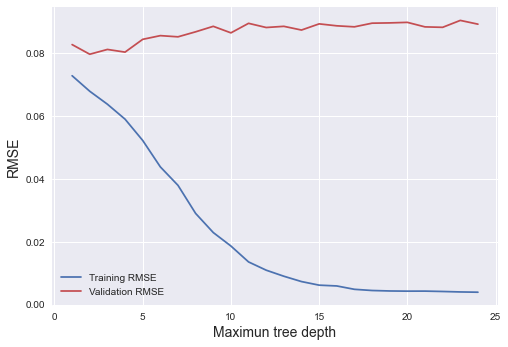

In [134]:
depths = np.arange(1,25,1)
X_test = test_scaled[cols].values

train_reg_results = []
validation_reg_results = []
train_reg_r2 = []
validation_reg_r2 = []

train_acc = []
val_acc = []
val_r2 = []
train_r2 = []

for depth in depths:
    
    reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.75, learning_rate = 0.3,
                max_depth = depth, n_estimators = 19, n_jobs=-1) 
    
    reg.fit(X, y)
    # Predicting the Traint set results
    y_pred_train = reg.predict(X)
    train_reg_results.append(np.sqrt(mean_squared_error(y, y_pred_train)))

    y_pred = reg.predict(X_test)
    validation_reg_results.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    train_reg_r2.append(mean_absolute_error(y, y_pred_train))

    validation_reg_r2.append(mean_absolute_error(y_test, y_pred))

    #print('R2 =',r2_score(y_test, predictions))

for i in range(len(train_reg_results)):
    train_acc.append(train_reg_results[i])
    val_acc.append(validation_reg_results[i])
    train_r2.append(train_reg_r2[i])
    val_r2.append(validation_reg_r2[i])


plt.figure('Complexity curve')
plt.style.use('seaborn')
plt.plot(depths, train_acc, 'b', label = 'Training RMSE')
plt.plot(depths, val_acc, 'r', label = 'Validation RMSE')
# plt.plot(n_estimators, train_r2, 'c', label = 'Training MAE')
# plt.plot(n_estimators, val_r2, 'y', label = 'Validation MAE')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Maximun tree depth', fontsize = 14)
#plt.title('Complexity curves for random forest', fontsize = 18, y = 1.03)
plt.legend()
plt.show()

In [133]:
depths[val_acc.index(min(val_acc))]

17

#### Percentage of columns samples by tree

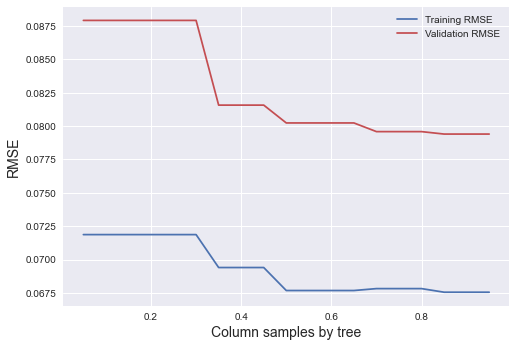

In [135]:
colsamples_bytree = np.arange(0.05,1,0.05)
X_test = test_scaled[cols].values

train_reg_results = []
validation_reg_results = []
train_reg_r2 = []
validation_reg_r2 = []

train_acc = []
val_acc = []
val_r2 = []
train_r2 = []

for colsample_bytree in colsamples_bytree:
    
    reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = colsample_bytree, learning_rate = 0.3,
                max_depth = 2, n_estimators = 19, n_jobs=-1) 
    
    reg.fit(X, y)
    # Predicting the Traint set results
    y_pred_train = reg.predict(X)
    train_reg_results.append(np.sqrt(mean_squared_error(y, y_pred_train)))

    y_pred = reg.predict(X_test)
    validation_reg_results.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    train_reg_r2.append(mean_absolute_error(y, y_pred_train))

    validation_reg_r2.append(mean_absolute_error(y_test, y_pred))

    #print('R2 =',r2_score(y_test, predictions))

for i in range(len(train_reg_results)):
    train_acc.append(train_reg_results[i])
    val_acc.append(validation_reg_results[i])
    train_r2.append(train_reg_r2[i])
    val_r2.append(validation_reg_r2[i])


plt.figure('Complexity curve')
plt.style.use('seaborn')
plt.plot(colsamples_bytree, train_acc, 'b', label = 'Training RMSE')
plt.plot(colsamples_bytree, val_acc, 'r', label = 'Validation RMSE')
# plt.plot(n_estimators, train_r2, 'c', label = 'Training MAE')
# plt.plot(n_estimators, val_r2, 'y', label = 'Validation MAE')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Column samples by tree', fontsize = 14)
#plt.title('Complexity curves for random forest', fontsize = 18, y = 1.03)
plt.legend()
plt.show()

In [121]:
colsamples_bytree[val_acc.index(min(val_acc))]

0.7000000000000001

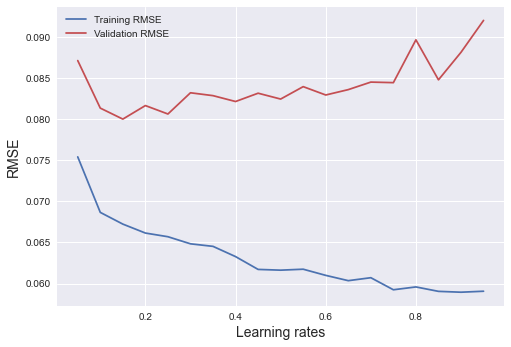

In [138]:
learning_rates = np.arange(0.05,1,0.05)
X_test = test_scaled[cols].values

train_reg_results = []
validation_reg_results = []
train_reg_r2 = []
validation_reg_r2 = []

train_acc = []
val_acc = []
val_r2 = []
train_r2 = []

for learning_rate in learning_rates:
    
    reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.8, learning_rate = learning_rate,
                max_depth = 2, n_estimators = 41, n_jobs=-1) 
    
    reg.fit(X, y)
    # Predicting the Traint set results
    y_pred_train = reg.predict(X)
    train_reg_results.append(np.sqrt(mean_squared_error(y, y_pred_train)))

    y_pred = reg.predict(X_test)
    validation_reg_results.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    train_reg_r2.append(mean_absolute_error(y, y_pred_train))

    validation_reg_r2.append(mean_absolute_error(y_test, y_pred))

    #print('R2 =',r2_score(y_test, predictions))

for i in range(len(train_reg_results)):
    train_acc.append(train_reg_results[i])
    val_acc.append(validation_reg_results[i])
    train_r2.append(train_reg_r2[i])
    val_r2.append(validation_reg_r2[i])


plt.figure('Complexity curve')
plt.style.use('seaborn')
plt.plot(learning_rates, train_acc, 'b', label = 'Training RMSE')
plt.plot(learning_rates, val_acc, 'r', label = 'Validation RMSE')
# plt.plot(n_estimators, train_r2, 'c', label = 'Training MAE')
# plt.plot(n_estimators, val_r2, 'y', label = 'Validation MAE')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Learning rates', fontsize = 14)
#plt.title('Complexity curves for random forest', fontsize = 18, y = 1.03)
plt.legend()
plt.show()

In [139]:
learning_rates[val_acc.index(min(val_acc))]

0.15000000000000002

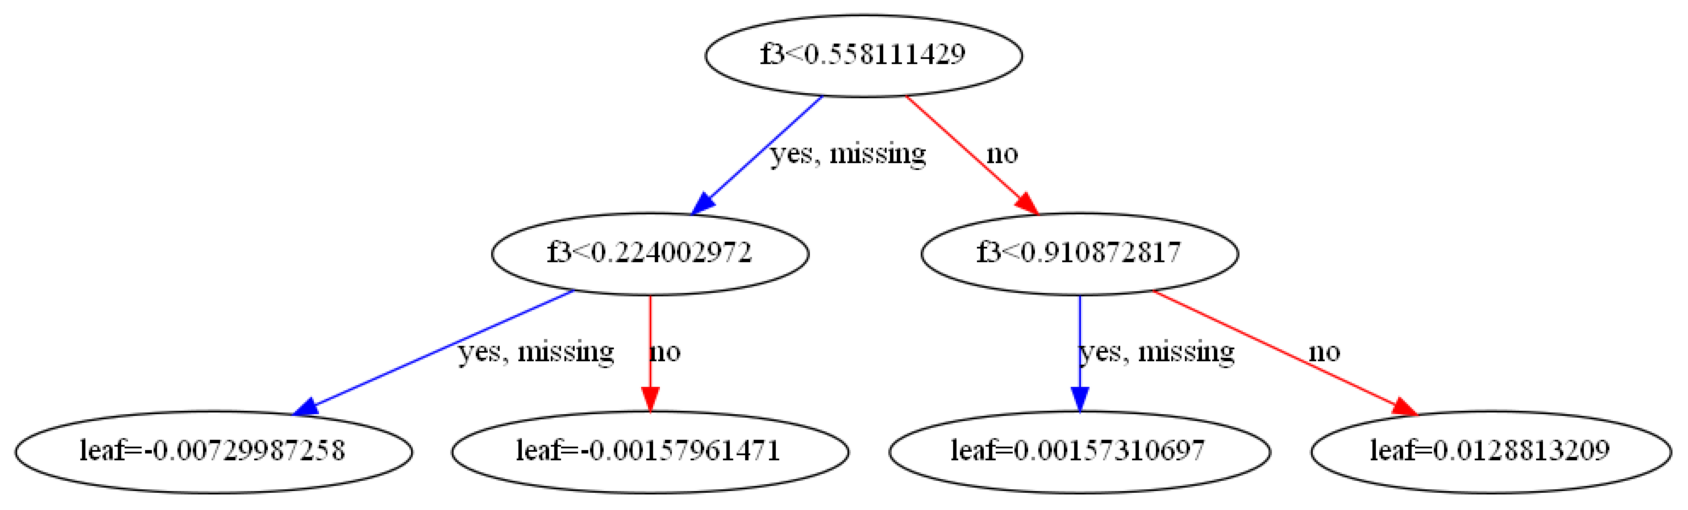

In [102]:
ax = xgb.plot_tree(xg_reg,num_trees=17)
fig = ax.figure
fig.set_size_inches(30, 35)
# fig = plot.get_figure()
# fig.savefig('test2png.png')

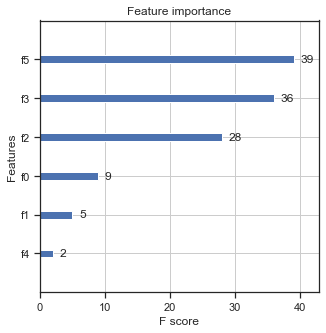

In [42]:
ax = xgb.plot_importance(xg_reg)
fig = ax.figure
fig.set_size_inches(5, 5)

In [570]:
params = {"objective":"reg:squarederror",'colsample_bytree': 1,'learning_rate': 0.1,
                'max_depth': 2, 'n_estimators': 24}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results

[16:47:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:47:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:47:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in la

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.184703,0.004767,0.184698,0.010201
1,0.169717,0.004059,0.170144,0.009442
2,0.156368,0.003339,0.157335,0.008304
3,0.144503,0.002710,0.145643,0.007433
4,0.134017,0.002161,0.135426,0.006475
5,0.124490,0.001644,0.126578,0.005556
6,0.116143,0.001114,0.118821,0.004802
7,0.108731,0.000760,0.111768,0.004038
8,0.102275,0.000452,0.105651,0.003612
9,0.096525,0.000226,0.100514,0.003175


# sklearn linear model

RMSE = 0.05570080164134235
RMSPE = 13.9582092543195
RME = 12.12037259496337
R2 = 0.8619943044997935
max error= 0.09687253211374391


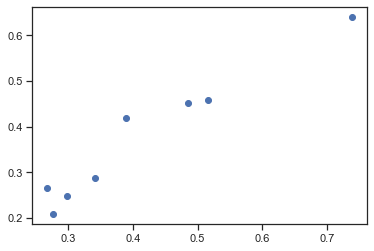

In [143]:
X = train_lm_scaled[cols].values
y = train_lm_scaled['consumption_per_km'].values

from sklearn import linear_model

linear_regr = linear_model.LinearRegression(n_jobs=-1)

linear_regr.fit(X, y)
y_pred_linear = linear_regr.predict(test_scaled[cols].values)
model_evaluation(y_test, y_pred_linear)
dump(linear_regr, open('MachineLearningModels/linear_regr_sklearn.pkl', 'wb'))

# Ann

RMSE = 0.03700099018388606
RMSPE = 6.780117999239938
RME = 5.958473119749152
R2 = 0.9391023110230107
max error= 0.09109996033793621


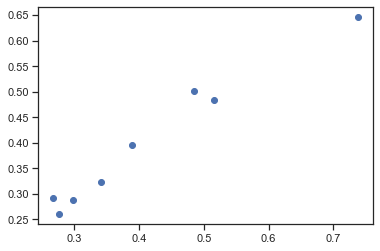

In [144]:
X = train_lm_scaled[cols].values
y = train_lm_scaled['consumption_per_km'].values

from sklearn.neural_network import MLPRegressor

ann_regr = MLPRegressor( activation='relu', alpha=0, hidden_layer_sizes= (50), max_iter=705000,
                        learning_rate='adaptive', warm_start=True, tol=1e-4, solver='lbfgs').fit(X, y)

#regr = MLPRegressor(random_state=1, max_iter=500, solver='lbfgs', activation='relu', alpha=0.002, hidden_layer_sizes=(150,)).fit(X, y)
y_ann=ann_regr.predict(test_scaled[cols].values)
ann_regr.score(test_scaled[cols].values, y_test)

model_evaluation(y_test, y_ann)
dump(ann_regr, open('MachineLearningModels/ann_regr.pkl', 'wb'))

In [137]:
print("Initialize Grid Search")
param_grid = { 
    'solver':['lbfgs'],
     #arning_rate': ["constant", "invscaling", "adaptive"],
    'hidden_layer_sizes': [(150,100), (150,)],
    'activation': ["logistic"],
    'max_iter':[10500],
    }


# create and fit a regression model, testing each parameter value


model = MLPRegressor()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_params_)

Initialize Grid Search
GridSearchCV(estimator=MLPRegressor(),
             param_grid={'activation': ['logistic'],
                         'hidden_layer_sizes': [(150, 100), (150,)],
                         'max_iter': [10500], 'solver': ['lbfgs']})
0.4046867943731205
{'activation': 'logistic', 'hidden_layer_sizes': (150,), 'max_iter': 10500, 'solver': 'lbfgs'}


# Learning curve

max train =  0.7632797103674955
max test =  0.7374481011196576
Fitting time =  0.15452144479751587


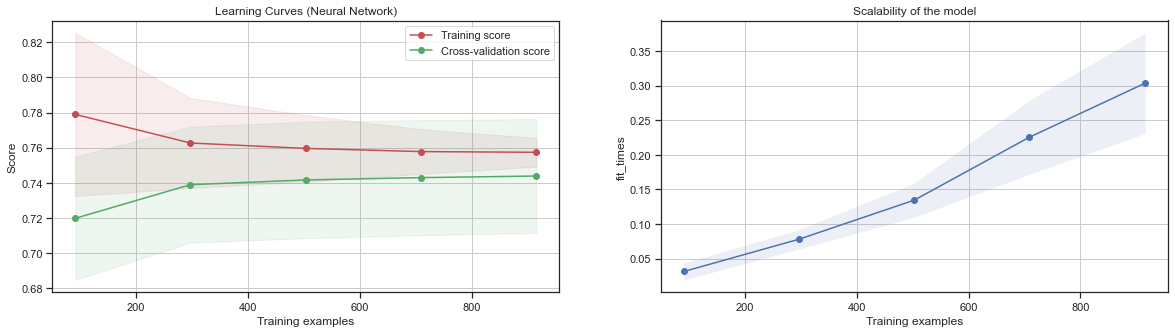

max train =  0.766423266607295
max test =  0.7102264349408406
Fitting time =  0.13397796583175658


<Figure size 432x288 with 0 Axes>

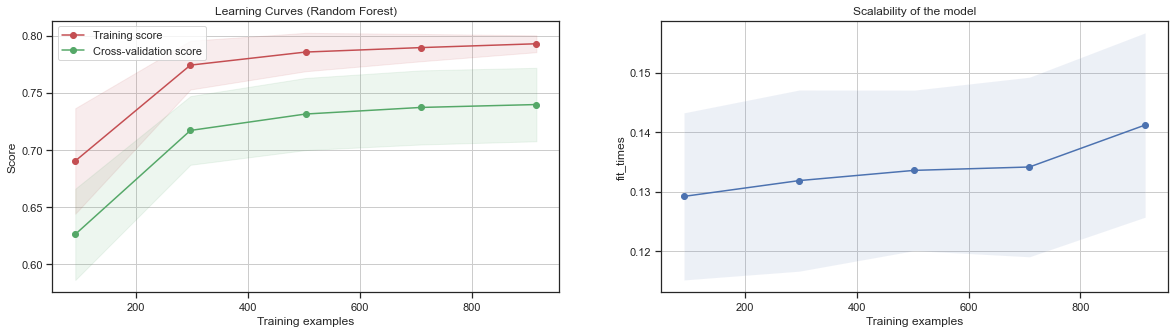

max train =  0.7631944991560544
max test =  0.7382794383613027
Fitting time =  0.0007136626243591309


<Figure size 432x288 with 0 Axes>

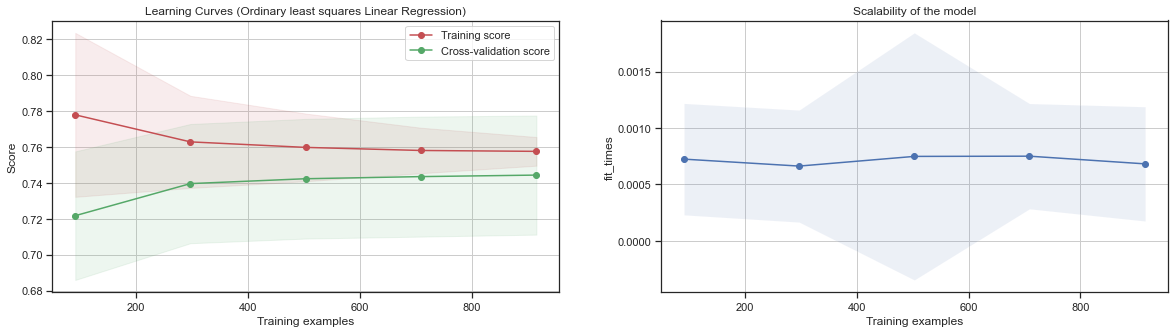

max train =  0.7950116657069843
max test =  0.7177116877724313
Fitting time =  0.07354231166839599


<Figure size 432x288 with 0 Axes>

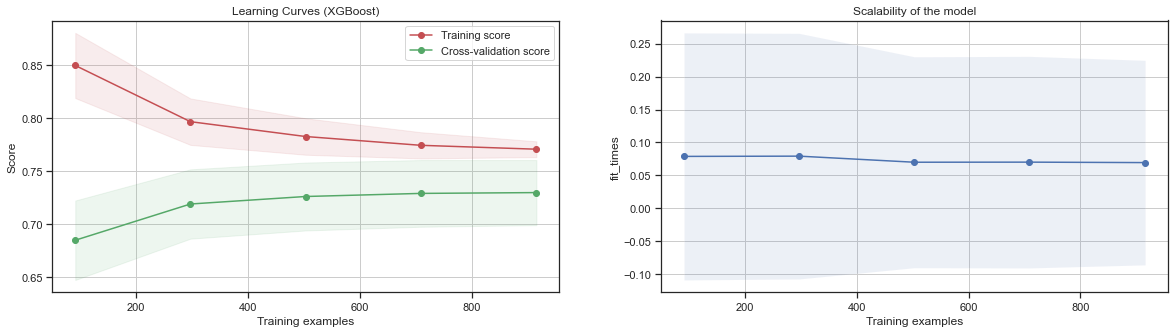

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
 
    if axes is None:
        _, axes = plt.subplots(1, 2, figsize=(20, 5))

    axes[0].set_title(title)
    #if ylim is not None:
        #axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    print('max train = ', np.mean(train_scores))
    print('max test = ', np.mean(test_scores))
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    print('Fitting time = ', np.mean(fit_times))

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    '''
    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, np.sort(test_scores_mean), 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")
    '''
    return plt


title = "Learning Curves (Neural Network)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = MLPRegressor(random_state=1, activation='tanh', alpha=0,
                         hidden_layer_sizes= (110 ), max_iter=70500, solver='lbfgs', learning_rate='invscaling')
plot_learning_curve(estimator, title, X, y, # ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)
plt.show()

plt.figure()
title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestRegressor(n_estimators = 53, max_features='auto', max_samples = 0.1,
                                  max_depth=8, criterion = 'mse', random_state = 0, n_jobs=-1)
plot_learning_curve(estimator, title, X, y, # ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)

plt.show() 

plt.figure()
title = "Learning Curves (Ordinary least squares Linear Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = linear_model.LinearRegression(n_jobs=-1)
plot_learning_curve(estimator, title, X, y,  # ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)

plt.show()


plt.figure()
title = "Learning Curves (XGBoost)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.8, learning_rate = 0.15,
                             max_depth = 2, n_estimators = 18)

plot_learning_curve(estimator, title, X, y, # ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)

plt.show()